In [1]:
import os, sys

import numpy as np
from scipy.linalg import eigh
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import scipy.linalg as sla
import pandas as pd
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry.polygon import LinearRing

from astropy.io import fits
from astropy import wcs
from matplotlib import cm
from matplotlib.colors import LogNorm

import warnings
warnings.filterwarnings('ignore')

from sbfTools import *

In [2]:
#https://math.stackexchange.com/questions/1114879/detect-if-two-ellipses-intersect

## Object Initialization

In [3]:
# obj = ellOBJ("n0679", outFolder="Outputs_n0679")
obj = ellOBJ("u12517", outFolder="Outputs_u12517")
# obj = ellOBJ("n0439", outFolder="Outputs_n0439")

In [4]:
obj.sky_med

3607.26513671875

Back Median: 3607.27
Back Mean: 3607.27
Back Stdev: 129.27


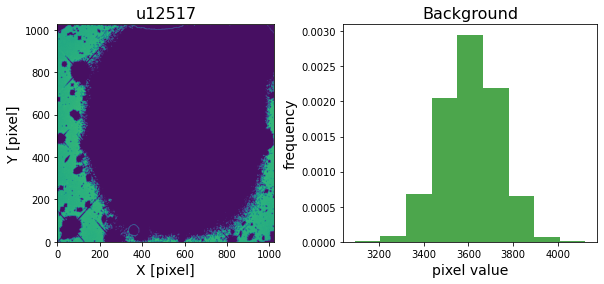

In [5]:
ax1, ax2 = obj.plot_background()

N_cross: 0
r0: 3
r1: 297
nr: 10
sky: 3246
CPU times: user 429 ms, sys: 431 ms, total: 860 ms
Wall time: 602 ms


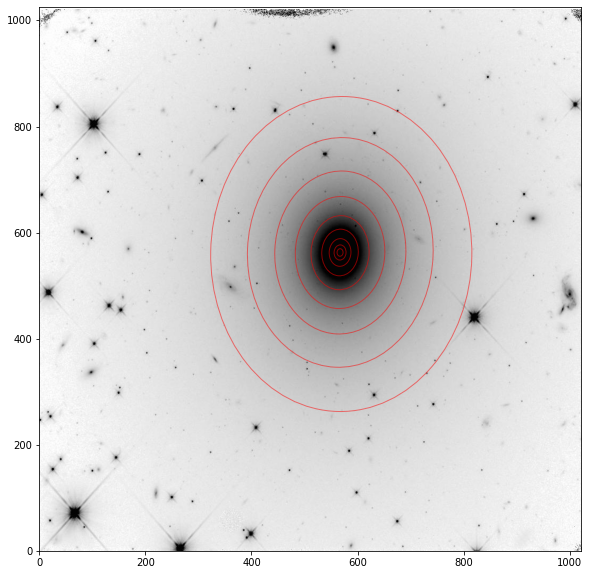

In [6]:
%%time

r0 = 3              # pixel
c_kron = 3       # Kron radius factor
k = 30 
sky_factor = 0.9    # always less than one

r1 = int(c_kron*np.sqrt(obj.a*obj.b))
nr = int(np.round(r1/k))
sky = int(sky_factor*obj.sky_med)

msg = obj.elliprof(r0, r1, nr=nr, sky=sky, niter=10, options="")

n_cross = Xellipses(obj.list_ellipses(model=0))
        
ax = obj.tv(options="sqrt")
ax = obj.plot_ellipse(model=0, ax=ax, alpha=0.5, linewidth=1, edgecolor='r', facecolor='none')

print("N_cross: %d"%n_cross)
print("r0: %d"%r0)
print("r1: %d"%r1)
print("nr: %d"%nr)
print("sky: %d"%sky)

N_cross: 15
r0: 3
r1: 1985
nr: 66
sky: 0
CPU times: user 2.57 s, sys: 719 ms, total: 3.29 s
Wall time: 2.4 s


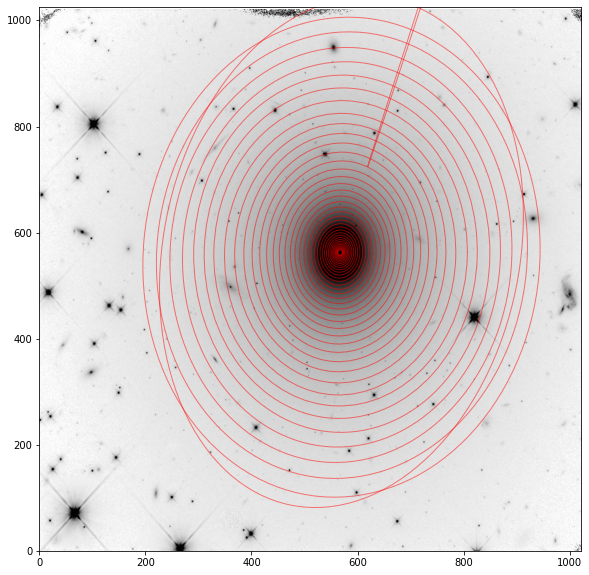

In [7]:
%%time

r0 = 3              # pixel
c_kron = 20       # Kron radius factor
k = 30 
sky_factor = 0    # always less than one

r1 = int(c_kron*np.sqrt(obj.a*obj.b))
nr = int(np.round(r1/k))
sky = int(sky_factor*obj.sky_med)

msg = obj.elliprof(r0, r1, nr=nr, sky=sky, niter=10, options="")

n_cross = Xellipses(obj.list_ellipses(model=0))
        
ax = obj.tv(options="sqrt")
ax = obj.plot_ellipse(model=0, ax=ax, alpha=0.5, linewidth=1, edgecolor='r', facecolor='none')

print("N_cross: %d"%n_cross)
print("r0: %d"%r0)
print("r1: %d"%r1)
print("nr: %d"%nr)
print("sky: %d"%sky)

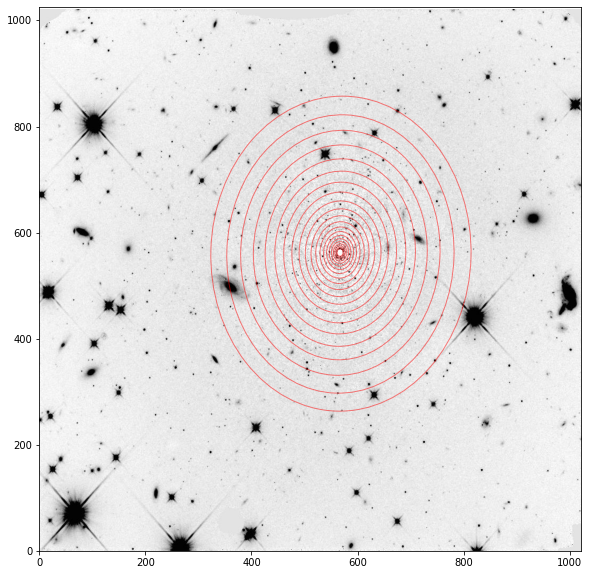

In [8]:
r0 = 7
r1 = int(3*np.sqrt(obj.a*obj.b))
nr = int(np.round(r1/14))
sky_factor = 0.9    # always less than one
sky = int(sky_factor*obj.sky_med)


# using common mask --> model 0 
obj.elliprof(r0, r1, nr=nr, sky=obj.sky_med, niter=10, options="COS4X=2")

# using residuals of model 0 --> mask 0
obj.objSEextract(model=0, smooth=3, minArea=10, thresh=5) 

obj.elliprof(r0, r1, nr=nr, sky=obj.sky_med, niter=10, options="COS4X=2", mask=0, model=1)

# plotting model 0
# ax = obj.tv_resid(model=0)

# ax = obj.tv_mask(mask=0)
ax = obj.tv_resid(model=0)

ax = obj.plot_ellipse(model=1, ax=ax, alpha=0.5, linewidth=1, edgecolor='r', facecolor='none')

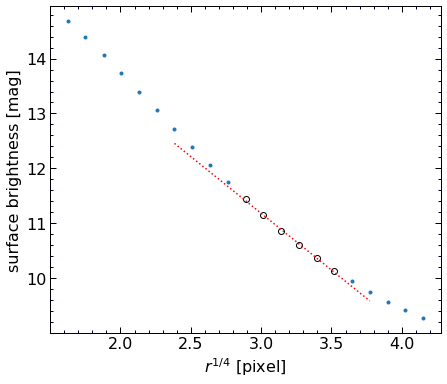

In [17]:
sky_factor = 0.1    # always less than one
sky = int(sky_factor*obj.sky_med)
# using common mask --> model 0 
obj.elliprof(r0, r1, nr=nr, sky=sky, niter=10, options="COS4X=2")


model = 0
root = obj.objRoot
suffix = '.%03d'%model

ellipseFile = root+'/elliprof'+suffix
df = pd.read_csv(ellipseFile, delimiter=r"\s+", skiprows=7)
df = df.apply(pd.to_numeric, errors='coerce')


fig, ax = plt.subplots(1,1, figsize=(7,6))

x = df.Rmaj**0.25
y = 2.5*np.log10(df.I0)
ax.plot(x, y, '.')

ax.set_xlabel(r"$r^{1/4}$"+" [pixel]", fontsize=16)
ax.set_ylabel(r"surface brightness"+" [mag]", fontsize=16)
set_axes(ax)

maxX = np.max(x)
minX = np.min(x)
dx = maxX-minX
x1 = 0.5*dx+minX
x2 = maxX-0.25*dx
x0 = x[((x<x2) & (x>x1))]
y0 = y[((x<x2) & (x>x1))]
ax.plot(x0, y0, 'ko', mfc='white')

m, b = np.polyfit(x0, y0, 1)

xrange = np.linspace(x1-0.2*dx, x2+0.1*dx, 100)
yrange = m*xrange+b

ax.plot(xrange, yrange, 'r:')


In [ ]:
%%time

r0 = 5              # pixel
c_kron = 5.0        # Kron radius factor
k = 14 
sky_factor = 0.9    # always less than one


t_indx = 100
indlst = []

for c_kron in np.arange(2.5, 5.5, 0.5):
    for sky_factor in np.arange(0.75, 1.1, 0.05):
        for r0 in range(3,11,2):
    
            r1 = int(c_kron*np.sqrt(obj.a*obj.b))
            nr = int(np.round(r1/k))
            sky = int(sky_factor*obj.sky_med)


            # generates model 0, using common mask
            if obj.elliprof(r0, r1, nr=nr, sky=sky, niter=10, options="") != 'OK':
                print("Err1: ", t_indx, r0, r1, nr, k, sky_factor, c_kron)
                t_indx+=1
                continue
            
            n_cross = Xellipses(obj.list_ellipses(model=0))
            if n_cross>0:
                print("N_cross 1: ", n_cross, t_indx, r0, r1, nr, k, sky_factor, c_kron)
                t_indx+=1
                continue
                
            # usese residuals of model 0, generates mask t
            obj.objSEextract(model=0, smooth=3, minArea=20, thresh=4, mask=t_indx)
            
            ## generates model t, uses mask t      
            if obj.elliprof(r0, r1, nr=nr, mask=t_indx, model=t_indx, niter=10, sky=sky, options="")  != 'OK':
                print("Err2: ", t_indx, r0, r1, nr, k, sky_factor, c_kron)
                t_indx+=1
                continue
                
            n_cross = Xellipses(obj.list_ellipses(model=t_indx))
            if n_cross>0:
                print("N_cross 2: ", n_cross, t_indx, r0, r1, nr, k, sky_factor, c_kron)
                t_indx+=1
                continue

        #     print(t_indx)
            indlst.append(t_indx)
            t_indx+=1


In [9]:
print(indlst)

NameError: name 'indlst' is not defined

In [ ]:
len(indlst)

In [10]:
def maksOpen(inMask):
    
    ## Monsta script
    script = """
    rd 1 """+inMask+"""
    wd 1 """+inMask+'.fits'+""" 
    q

    """       

    run_monsta(script, 'monsta.pro', 'monsta.log')
    xcmd("rm monsta.log; rm monsta.pro", False)
    return imOpen(inMask+'.fits')

In [11]:
outFolder = 'Outputs_'+obj.name+'/'

In [12]:
%%time

IM = None
for idx in indlst:
    suffix = '.%03d'%idx
    mask_name = "mask"+suffix
    
    im, header = maksOpen(outFolder+mask_name)
    im = np.abs(im-1)
    
    if IM is None:
        IM = im
    else:
        IM = IM+im

IM /= len(indlst)
IM[IM>=0.99] = 1
IM[IM<0.99] = 0

IM = np.abs(IM-1)      
plt.imshow(IM, cmap=plt.get_cmap('gray'))


NameError: name 'indlst' is not defined

In [13]:
fits.writeto(outFolder+'mask.super.fits', IM, header, overwrite=True)

NameError: name 'header' is not defined

In [14]:
name = obj.name
segment = outFolder+'segment.fits'
objCatal = outFolder+'catal.cat'
objname = "{}/{}j.fits".format(name,name)
sex_cmd = """sex """+objname+""" -c wfc3j.inpar -CHECKIMAGE_TYPE SEGMENTATION -CHECKIMAGE_NAME """+segment
sex_cmd += " -CATALOG_NAME  "+objCatal
sex_cmd += " -DETECT_MINAREA 10"
sex_cmd += " -DETECT_THRESH 2"
sex_cmd += " -WEIGHT_TYPE NONE"
xcmd(sex_cmd, True)
#######################################
im, _ = imOpen(segment)
im[im<=1] = 1
im[im>1] = 0
IM_ = IM * im
plt.imshow(IM, cmap=plt.get_cmap('gray'))
fits.writeto(outFolder+'mask.super.fits', np.float32(IM_), header, overwrite=True)


sex u12517/u12517j.fits -c wfc3j.inpar -CHECKIMAGE_TYPE SEGMENTATION -CHECKIMAGE_NAME Outputs_u12517/segment.fits -CATALOG_NAME  Outputs_u12517/catal.cat -DETECT_MINAREA 10 -DETECT_THRESH 2 -WEIGHT_TYPE NONE


TypeError: unsupported operand type(s) for *: 'NoneType' and 'NoneType'

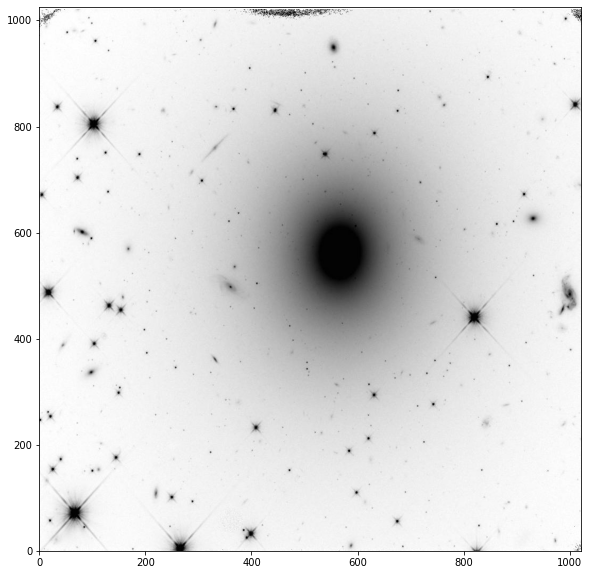

In [15]:
obj.tv(options='log')

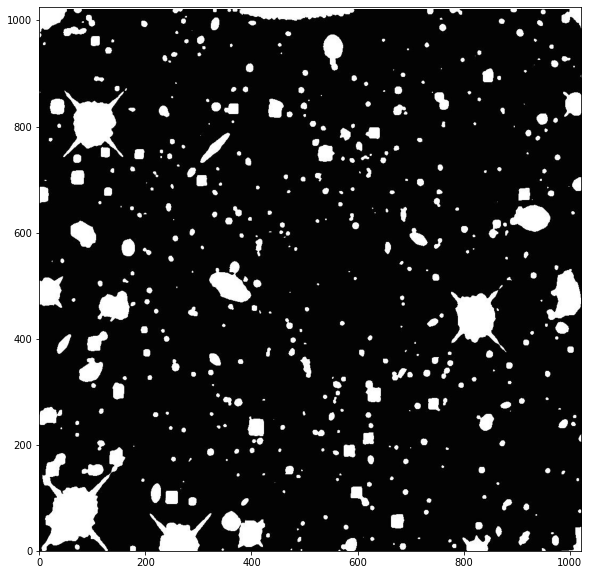

In [16]:
tv(outFolder+'mask.super.fits')

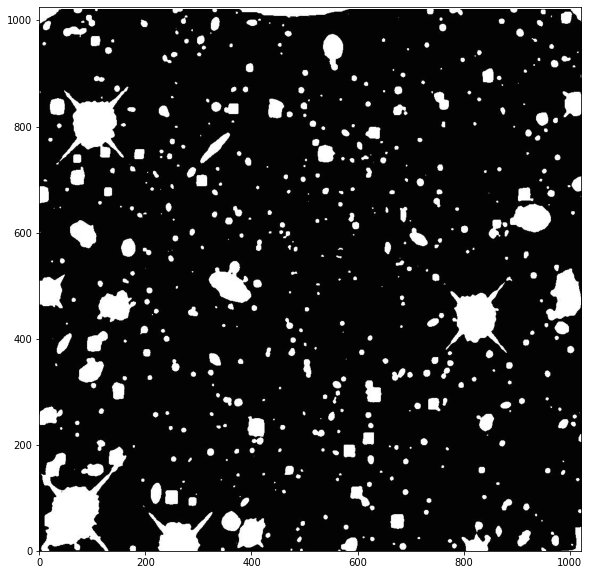

In [9]:
obj.plot_mask(mask=140)

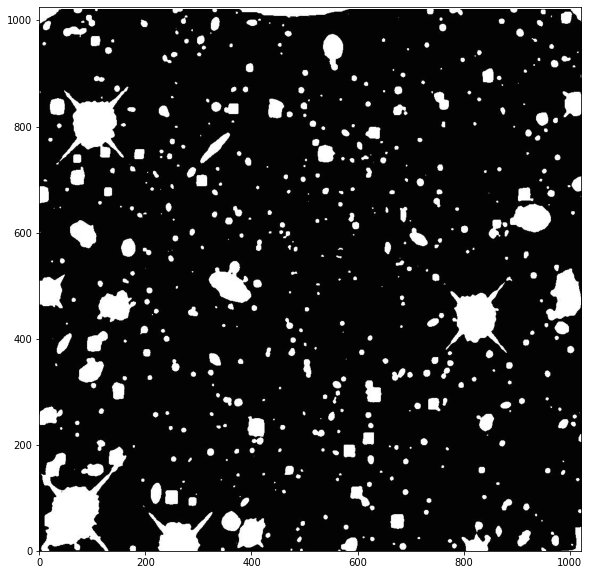

In [7]:
mask_name = "mask.140"
ax = tv('Outputs_'+obj.name+'/'+mask_name)

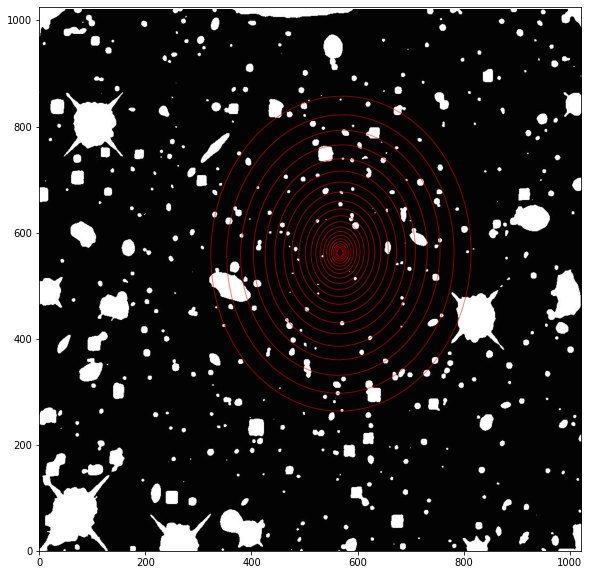

In [9]:
r0 = 7
r1 = int(3*np.sqrt(obj.a*obj.b))
nr = int(np.round(r1/14))
sky_factor = 0.9    # always less than one
sky = int(sky_factor*obj.sky_med)


# using common mask --> model 0 
obj.elliprof(r0, r1, nr=nr, sky=obj.sky_med, niter=10, options="COS4X=2")

# using residuals of model 0 --> mask 0
obj.objSEextract(model=0, smooth=3, minArea=10, thresh=5) 

obj.elliprof(r0, r1, nr=nr, sky=obj.sky_med, niter=10, options="COS4X=2", mask=0, model=1)

# plotting model 0
# ax = obj.tv_resid(model=0)

ax = obj.tv_mask(mask=0)

ax = obj.plot_ellipse(model=1, ax=ax, alpha=0.5, linewidth=1, edgecolor='r', facecolor='none')

297 21 3246
CPU times: user 56 ms, sys: 40 ms, total: 96 ms
Wall time: 1.4 s


Text(0.5, 1.0, 'u12517')

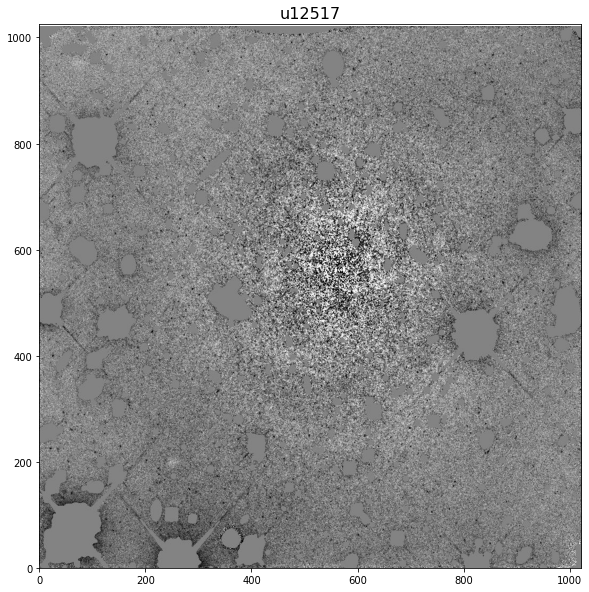

In [32]:
%%time

r0 = 3
r1 = int(3*np.sqrt(obj.a*obj.b))
nr = int(np.round(r1/14))
sky_factor = 0.9    # always less than one
sky = int(sky_factor*obj.sky_med)

print(r1, nr, sky)


# generates model 0, using common mask
obj.elliprof(r0, r1, nr=nr, sky=sky, niter=10, options="COS4X=2") 

# usese residuals of model 0, generates mask 0
obj.objSEextract(model=0, smooth=3, minArea=15, thresh=3)    

## generates model 1, uses mask 0      
obj.elliprof(r0, r1, nr=nr, mask=0, model=1, niter=10, sky=sky, options="COS4X=2")  

ax = obj.tv_resid(model=1)

# ax = obj.tv(options='sqrt cf=jt')
# Ell = make_Ellipse([obj.x0, obj.y0], obj.a, obj.b, obj.angle)
# plot_Ellipse(Ell, ax=ax, edgecolor='r', facecolor='none')

# ax = obj.plot_ellipse(model=1, ax=ax, alpha=0.5, linewidth=1, edgecolor='r', facecolor='none')



ax.set_title(obj.name, fontsize=16)

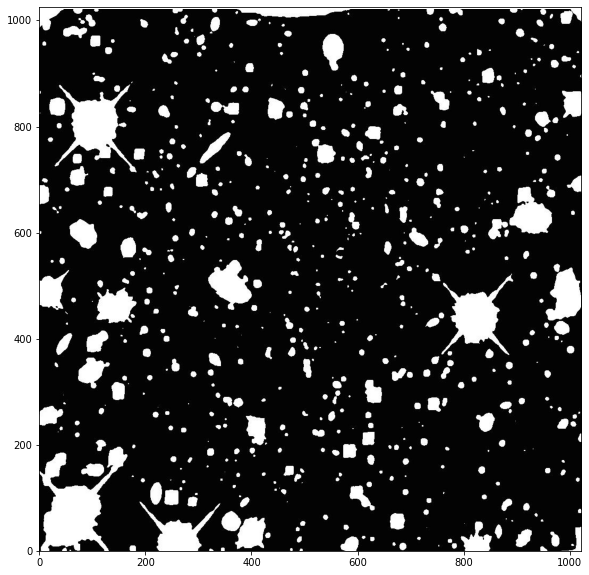

In [21]:
mask_name = "mask.000"
ax = tv('Outputs_'+obj.name+'/'+mask_name)

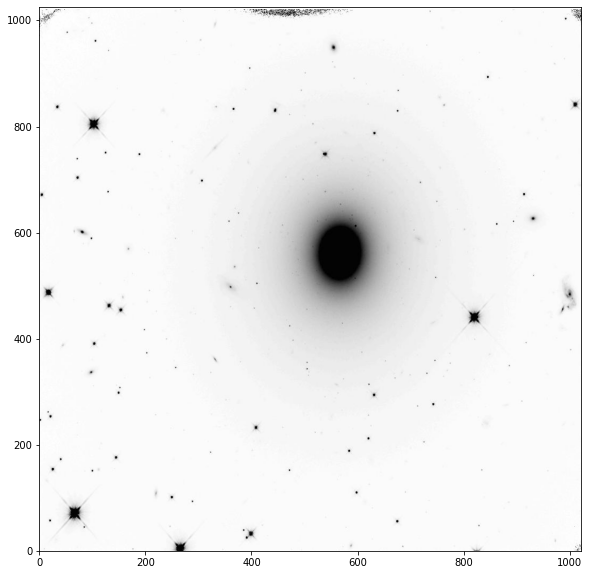

In [22]:
obj.tv(options="sqt", additions="smooth 1 fw=0")

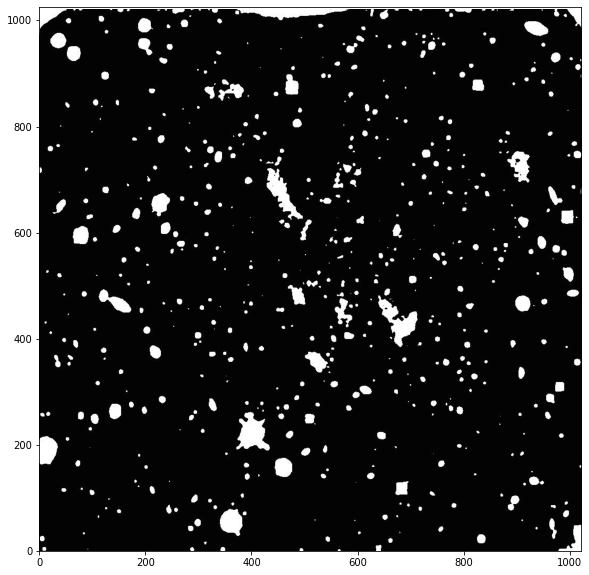

In [23]:
ax = tv('Outputs_n0679/mask.000')
# ax = obj.plot_ellipse(model=0, ax=ax, alpha=0.5, linewidth=2, edgecolor='r', facecolor='none')

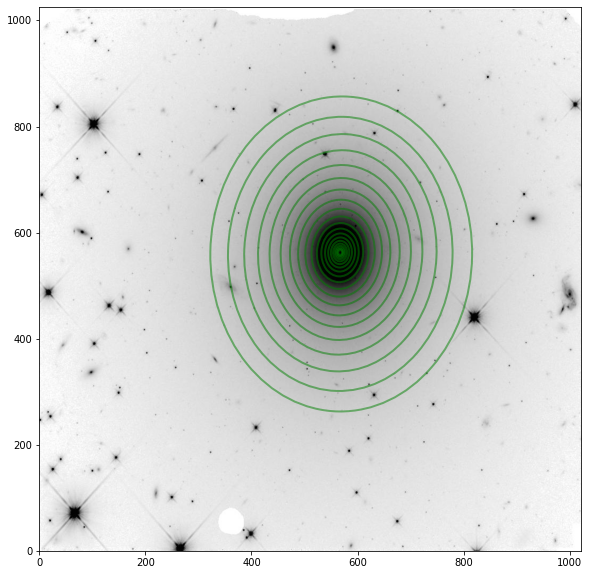

In [24]:
ax = obj.plot_object(model=0)
ax = obj.plot_ellipse(model=0, ax=ax, alpha=0.5, linewidth=2, edgecolor='g', facecolor='none')

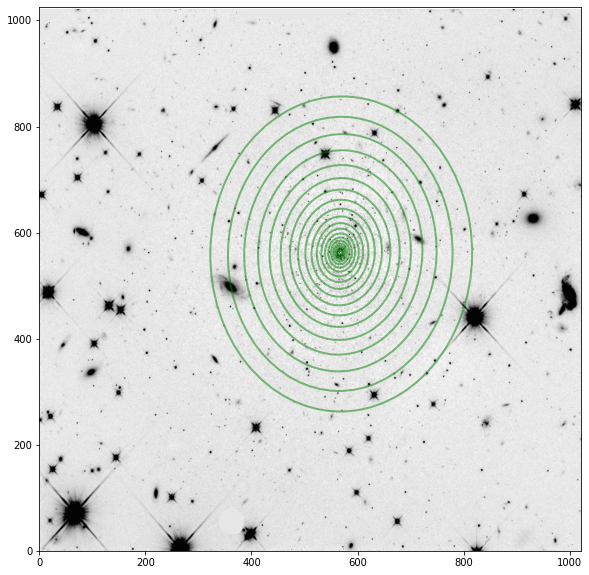

In [25]:
ax = obj.plot_resid(model=0)
ax = obj.plot_ellipse(model=0, ax=ax, alpha=0.5, linewidth=2, edgecolor='g', facecolor='none')

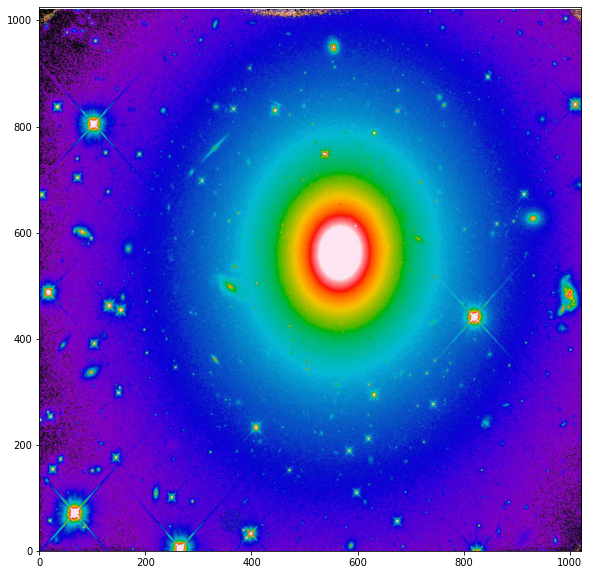

In [26]:
obj.tv(options="sqrt cf=jt")

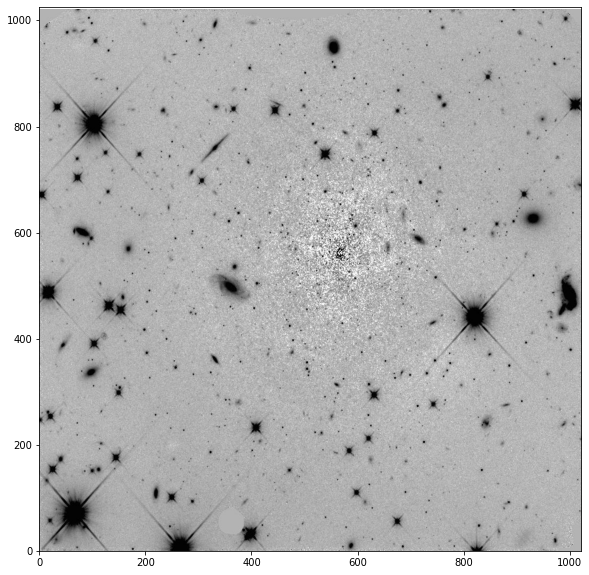

In [27]:
obj.tv_resid(model=0, options="sqrt")

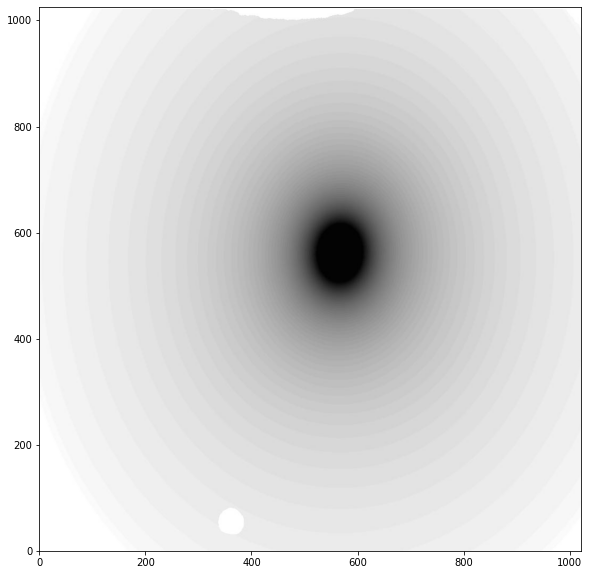

In [28]:
obj.tv_model(model=0, options="sqrt")

In [29]:
imarray.shape

NameError: name 'imarray' is not defined